### Utility to plot and compare truth and predicted label

This is really try to figure out what wrong. So focus on label checking. Not data processing.

In [11]:
import numpy as np
# proj_pointcloud is the 2D numpy array with dimention (proj_h, proj_w, 10) and each elements include range,x,y,z,intensity,flag,r,g,b,label
import matplotlib.pyplot as plt
import os
import torch

In [2]:
mapped_class_name = {
    0: "unlabeled",
    1: "car",
    2: "bicycle",
    3: "motorcycle",
    4: "truck",
    5: "other-vehicle",
    6: "person",
    7: "bicyclist",
    8: "motorcyclist",
    9: "road",
    10: "parking",
    11: "sidewalk",
    12: "other-ground",
    13: "building",
    14: "fence",
    15: "vegetation",
    16: "trunk",
    17: "terrain",
    18: "pole",
    19: "traffic-sign"
}

In [15]:
# A quick eval with out much of dataset loading, just data by itself, also no gpu
from model.RangeViTSegmentationModel import RangeViTSegmentationModel
model = RangeViTSegmentationModel(n_classes=20, in_channels=9)
def eval_model_quick(model, data):
    model.eval()
    feats = data[:, :, :9]  # Use the first 9 channels as features
    feats = torch.tensor(feats).permute(2, 0, 1).float()  # to [C, H, W]
    feats = feats.unsqueeze(0)  # Add batch dimension [1, C, H, W]
    outputs = model(feats)
    preds = outputs.argmax(dim=1)
    return preds


In [24]:
# plot label image from proj_pointcloud, and show the corresponding class names in x and y axis
def plot_label(proj_pointcloud):
    # if the proj_pointcloud is 3D array
    if proj_pointcloud.ndim == 3:
        label_img = proj_pointcloud[..., 9]
    else:  # 2D case
        label_img = proj_pointcloud
    plt.figure(figsize=(12, 6))
    im = plt.imshow(label_img, cmap='tab20', vmin=0, vmax=19)
    plt.axis('off')
    # Show class names as colorbar tick labels
    num_classes = 20
    class_names = [mapped_class_name[i] for i in range(num_classes)]
    cbar = plt.colorbar(im, ticks=np.arange(num_classes), orientation='horizontal')
    cbar.ax.set_xticklabels(class_names, rotation=45, ha='right')
    plt.show()

# plot the range
def plot_range(proj_pointcloud):
    plt.figure(figsize=(12, 6))
    plt.imshow(proj_pointcloud[..., 0], cmap='jet')
    plt.axis('off') # do not show x and y axis
    plt.show()

# plot RGB image from proj_pointcloud
def plot_rgb(proj_pointcloud):
    plt.figure(figsize=(12, 6))
    # proj_pointcloud[..., 6:9] are r,g,b channels
    rgb = proj_pointcloud[..., 6:9]
    # Clip values to [0, 1] if normalized, else to [0, 255]
    if rgb.max() <= 1.0:
        rgb = (rgb * 255).astype(np.uint8)
    else:
        rgb = rgb.astype(np.uint8)
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()

In [5]:
proj_w=480
proj_h=48
# Read the file into pcd and reshape as (proj_h, proj_w, 10)
pcd = np.fromfile('../sequences/08/preprocess_mini/000100.bin', dtype=np.float32).reshape(proj_h, proj_w, 10)

In [ ]:
# Load the model if you have a pre-trained one
pretrain_path = 'range_vit_segmentation_4645.pth'
if os.path.exists(pretrain_path):
    print(f"Loading pre-trained model from {pretrain_path}")
    model.load_state_dict(torch.load(pretrain_path))
pred = eval_model_quick(model, pcd)
# plot the predictions
pred = pred.squeeze(0)  # Remove batch dimension
#  make pred to be array
pred = pred.detach().cpu().numpy()

Loading pre-trained model from range_vit_segmentation_4645.pth


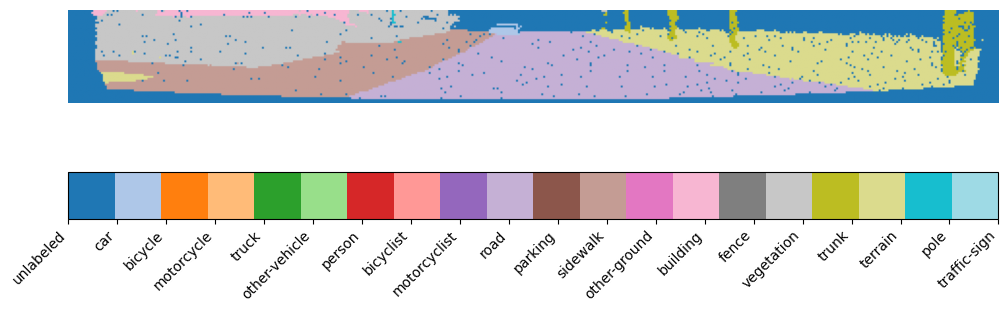

In [6]:
plot_label(pcd)


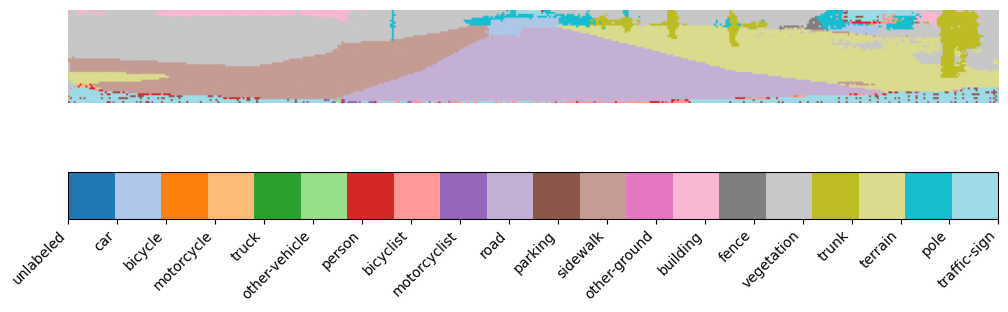

In [19]:

plot_label(pred)

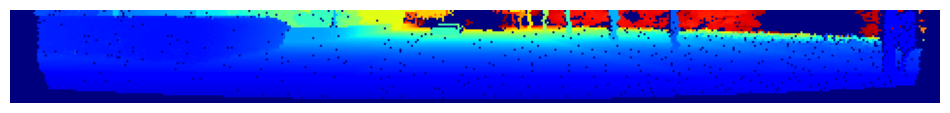

In [25]:
plot_range(pcd)

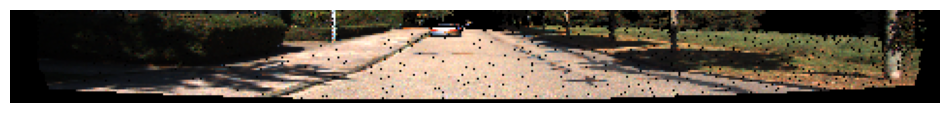

In [26]:
plot_rgb(pcd)